# Итоговый проект модуля "Продуктовая аналитика"

&emsp; Я — аналитик данных, и сейчас устраиваюсь в стартап, который создает новый маркетплейс. Он недавно появился на рынке и занимается продажей новых товаров из Бразилии, которые только начинают поступать в продажу.

&emsp; Продакт-менеджер Петя переживает за свой продукт, так как выручка маркетплейса стоит на месте уже несколько месяцев. Он предложил мне полную свободу действий. Главное — чтобы метрики росли, а мы не причиняли неудобства клиентам, ведь Петя заботится об их опыте.

## Импортируем библиотеки и считаем датасеты

In [1]:
import pandas as pd
import numpy as np
from operator import attrgetter
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns
from math import floor

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')

## Проведем предварительное исследование датасетов

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers.info() #нет пропущенных значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
customers.duplicated().sum() # нет дубликатов

0

In [6]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_items.info()#нет пропущенных значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [9]:
order_items.duplicated().sum() # нет дубликатов

0

In [10]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
orders.info() #имеются пропущенные значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,7a13334e5a41d1623e0c3120b19aa5e4,4492f85a663f8b75a94718799f60a8a1,delivered,2018-03-31 15:08:21,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [14]:
orders.duplicated().sum() # нет дубликатов

0

## Задача 1. Оценим месячный retention в оформление заказа с помощью когортного анализа.

### На первом этапе посмотрим на метрики маркетплейса и на возвращаемость клиента в продукт.

In [15]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### &emsp; Для расчета Retention с целью оценки возвращаемости в продукт целесообразнее всего использовать показатель даты создания заказа order_purchase_timestamp при этом отфильтровать заказы со статусом доставлен пользователю - delivered.  Также необходимо добавить уникальные id клиентов  из таблицы customers

In [16]:
orders_copy = orders.query('order_status == "delivered"')\
    .merge(customers, how='left', on = 'customer_id')[['customer_unique_id', 'order_purchase_timestamp']]

*Переведем order_purchase_timestamp в формат datetime*

In [17]:
orders_copy['order_purchase_timestamp'] = pd.to_datetime(orders_copy['order_purchase_timestamp'])

In [18]:
orders_copy.head()

,customer_unique_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39


*Извлекаем месяц и день из order_purchase_timestamp*

In [19]:
orders_copy['order_period'] = orders_copy['order_purchase_timestamp'].dt.to_period('M')
orders_copy['order_period_day'] = orders_copy['order_purchase_timestamp'].dt.to_period('D')

*Присваиваем когорты на основе даты первого действия для каждого пользователя*

In [20]:
orders_copy['cohort'] = orders_copy.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
orders_copy['cohort_day'] = orders_copy.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')

*Рассчитываем номер периода в днях (месячные периоды, деля на 30)*

In [21]:
orders_copy['period_number_month'] = np.floor((orders_copy.order_period_day - orders_copy.cohort_day).apply(attrgetter('n')) / 30)

*Агрегируем данные по когортам и рассчитанному номеру периода (в месяцах)*

In [22]:
df_cohort = orders_copy.groupby(['cohort', 'period_number_month']).agg(n_customers=('customer_unique_id', 'nunique')).reset_index()

In [23]:
df_cohort.head()

,cohort,period_number_month,n_customers
0,2016-09,0.0,1
1,2016-10,0.0,262
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1


*Создаем сводную таблицу для когортного анализа*

In [24]:
cohort_pivot_table = df_cohort.pivot(index = 'cohort', columns = 'period_number_month', values = 'n_customers')

In [25]:
cohort_pivot_table.head()

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN


*Рассчитываем размеры когорт*

In [26]:
cohort_size = cohort_pivot_table.iloc[:, 0]

*Вычисляем Retention*

In [27]:
retention_matrix = cohort_pivot_table.divide(cohort_size, axis=0)

In [28]:
pd.set_option('display.max_columns', None) # вывод всех столбцов

In [29]:
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,0.005579,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,0.000614,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,0.001998,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,0.000887,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,0.002318,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,0.001976,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


- ### Чему равен медианный retention за первый месяц? -- 0.003546

In [30]:
retention_matrix.median()

period_number_month
0.0     1.000000
1.0     0.003546
2.0     0.002691
3.0     0.002399
4.0     0.002421
5.0     0.001900
6.0     0.002665
7.0     0.001841
8.0     0.001479
9.0     0.002457
10.0    0.001998
11.0    0.002681
12.0    0.001598
13.0    0.001854
14.0    0.001317
15.0    0.001023
16.0    0.001043
17.0    0.002316
19.0    0.004514
20.0    0.003817
21.0    0.003817
dtype: float64

- ### Найдем когорту с самым высоким retention на 3-й месяц.

In [31]:
retention_matrix[3].idxmax()

Period('2017-01', 'M')

In [32]:
retention_matrix[3].max()

0.005578800557880056

# Задача 2. Определим, существует ли product/market fit у маркетплейса?

&emsp; Исходя из результатов, полученных при когортном анализе, можно сделать вывод о крайне низком уровне Retention по всем когортам, что, в свою очередь, свидетельствует об отсутствии у маркетплейса PMF, так как ключевым фактором наличия PMF является регулярность использования продукта после первого использования(если в нашем случае это не маркетплейс дорогостоящих товаров, которые покупаются крайне редко, например: яхты или самолеты).
В связи с явным отсутствием PMF у продукта команде необходимо обнаружить корневые причины данного явления. Так как каждый месяц в продукт приходит достаточное количество пользователей, а их отток в следующем месяце составляет в среднем более 99%, то возможно у продукта страдает качество обслуживания после приобретения товаров/услуг, что резко отталкивает пользователей после первых заказов. Кроме того, не исключаем некорретную работу(наличие критических багов) на этапе, следующем после оплаты товара(некорректно работают страницы с отслеживанием статуса заказа, способов получения и пр.). Также возможно страдает качество самих продаваемых товаров/услуг.

   &emsp;Таким образом, продуктовой команде рекомендовано:


- Совместно с разработчиками пройти путь клиента с целью выявления критических багов.
- Получить обратную связь от клиентов, уточнив, что послужило причиной прекращения пользования продуктом.
- Дополнительно проработать с отделом маркетинга способы возвращения в продукт текущих пользователей (пуши, промо-акции), так как по результату когортного анализа видно, что работа маркетингового отдела направлена по большей части на привлечение новых, а не на возвращение старых клиентов.

## &emsp;Задача 3. Определим 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании.


### 1. Ежемесячный доход - данная метрика будет отражать рост объема продаж

In [33]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [34]:
orders['month'] = orders['order_purchase_timestamp'].dt.to_period('M')  

In [35]:
orders_copy_2 = orders.query('order_status == "delivered"')\
    .merge(order_items, how='inner', on = 'order_id')[['order_id', 'month', 'price']]

In [36]:
monthly_revenue = orders_copy_2.groupby('month', as_index=False).price.sum()


In [37]:
monthly_revenue.head()

,month,price
0,2016-09,134.97
1,2016-10,40325.11
2,2016-12,10.90
3,2017-01,111798.36
4,2017-02,234223.40


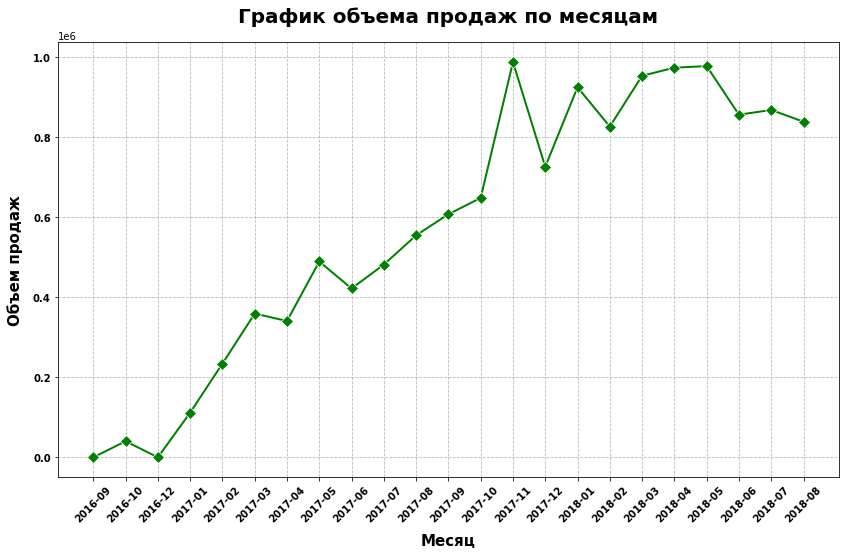

In [38]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_revenue, 
                  x=monthly_revenue['month'].astype(str), 
                  y='price',
                  color='green',
                  marker= 'D',
                  markersize=8,
                  linewidth=2)
plt.title('График объема продаж по месяцам', 
          fontsize=20, pad=20, fontweight='heavy')
plt.xlabel('Месяц', fontsize=15, labelpad=10, fontweight='bold')
plt.ylabel('Объем продаж', fontsize=15, labelpad=10, fontweight='bold')

# Настройка осей
plt.xticks(rotation=45, fontweight='black')
plt.yticks(fontweight='black')
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.grid(axis='y', linestyle='--', alpha=0.9)

### 2. Количество платящих клиентов по месяцам - данная метрика будет показывать объем аудитории, которой продукт доставляет ценность.

In [39]:
orders_copy_3 = orders.query('order_status == "delivered"')\
    .merge(customers, how='left', on = 'customer_id')[['customer_unique_id', 'month', 'order_id']]

In [40]:
monthly_paying_users = orders_copy_3.groupby('month', as_index=False).customer_unique_id.nunique()\

In [41]:
monthly_paying_users.head()

,month,customer_unique_id
0,2016-09,1
1,2016-10,262
2,2016-12,1
3,2017-01,718
4,2017-02,1630


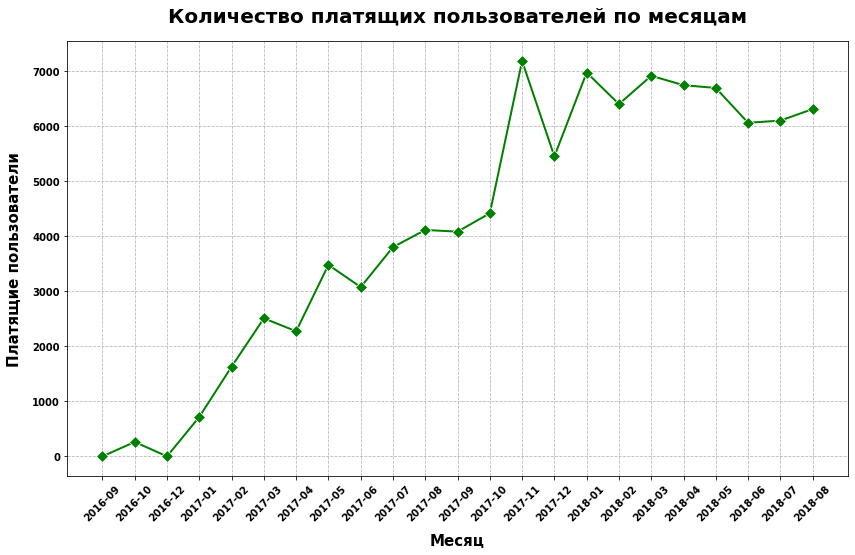

In [42]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_paying_users, 
                  x=monthly_paying_users['month'].astype(str), 
                  y='customer_unique_id',
                  color='green',
                  marker= 'D',
                  markersize=8,
                  linewidth=2)
plt.title('Количество платящих пользователей по месяцам', 
          fontsize=20, pad=20, fontweight='heavy')
plt.xlabel('Месяц', fontsize=15, labelpad=10, fontweight='bold')
plt.ylabel('Платящие пользователи', fontsize=15, labelpad=10, fontweight='bold')

# Настройка осей
plt.xticks(rotation=45, fontweight='black')
plt.yticks(fontweight='black')
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.grid(axis='y', linestyle='--', alpha=0.9)

### 3. Конверсия в платящего - данная метрика будет отражать заинтересованность новых клиентов в продукте.

### 4. Retention -  данная метрика будет отражать вовлеченность клиента в продолжение использования продукта.

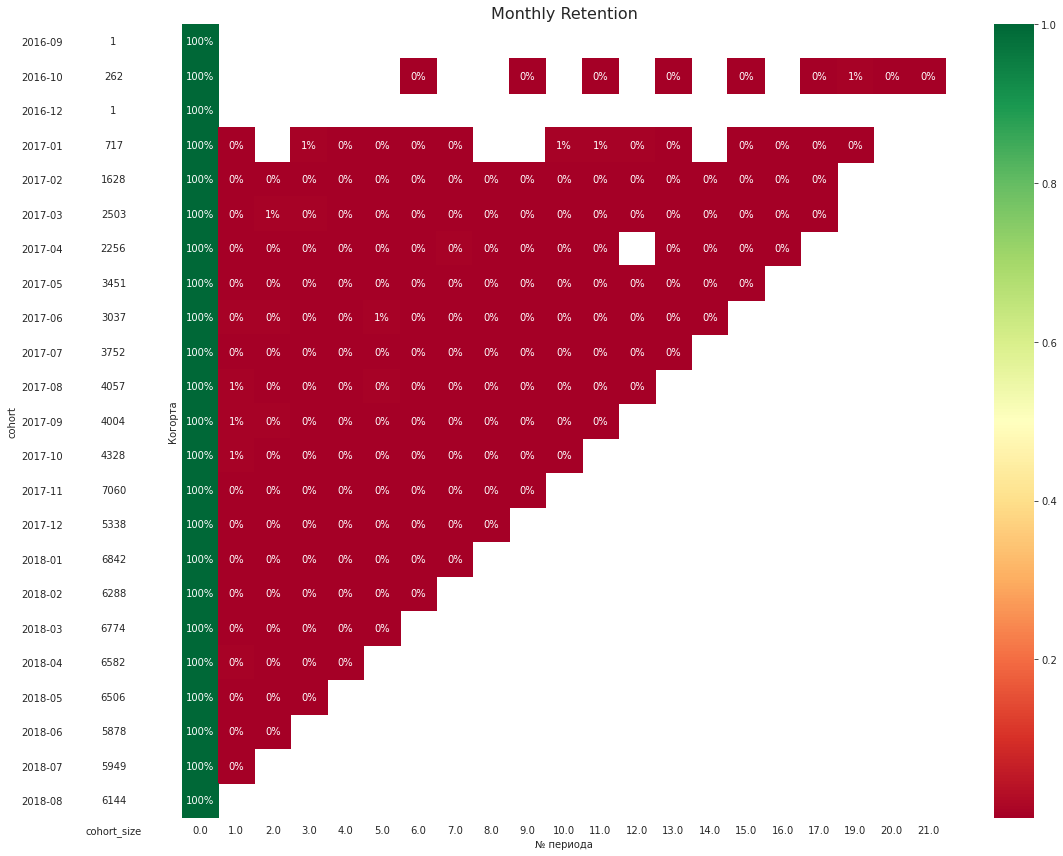

In [43]:
# Строим тепловую карту когортного анализа
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

### 5. Средняя выручка на одного платящего клиента - данная метрика будет отражать денежное выражение вовлеченности клиента.

In [44]:
arpu_df = orders.query('order_status == "delivered"')\
    .merge(customers, how='left', on = 'customer_id')\
    .merge(order_items, how='inner', on = 'order_id')[['customer_unique_id','price', 'month']]

In [45]:
monthly_arpu = arpu_df.groupby('month', as_index=False).agg(
    month_revenue=('price', 'sum'),
    month_paying_users=('customer_unique_id', 'nunique'))

In [46]:
monthly_arpu.head()

,month,month_revenue,month_paying_users
0,2016-09,134.97,1
1,2016-10,40325.11,262
2,2016-12,10.90,1
3,2017-01,111798.36,718
4,2017-02,234223.40,1630


In [47]:
monthly_arpu['arpu'] = monthly_arpu['month_revenue']/monthly_arpu['month_paying_users']

In [48]:
monthly_arpu.head()

,month,month_revenue,month_paying_users,arpu
0,2016-09,134.97,1,134.970000
1,2016-10,40325.11,262,153.912634
2,2016-12,10.90,1,10.900000
3,2017-01,111798.36,718,155.708022
4,2017-02,234223.40,1630,143.695337


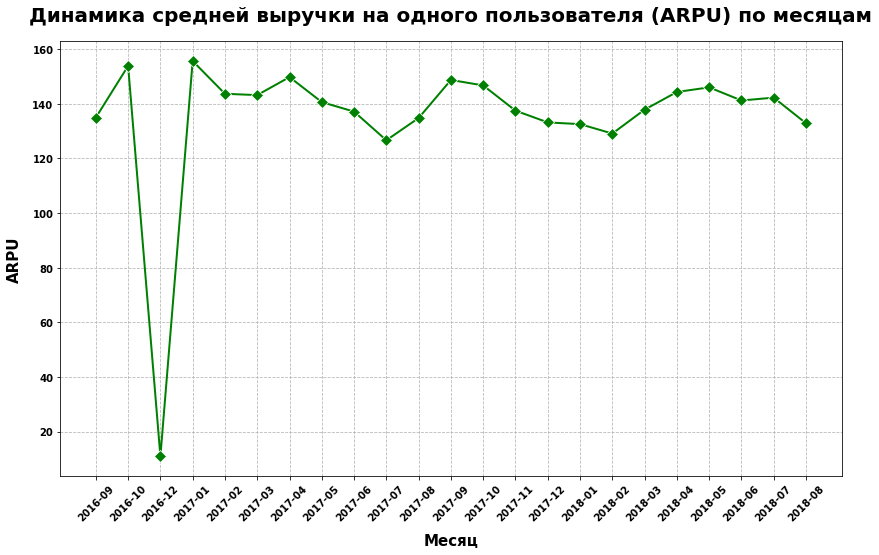

In [49]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_arpu, 
                  x=monthly_arpu['month'].astype(str), 
                  y='arpu',
                  color='green',
                  marker= 'D',
                  markersize=8,
                  linewidth=2)
plt.title('Динамика средней выручки на одного пользователя (ARPU) по месяцам', 
          fontsize=20, pad=20, fontweight='heavy')
plt.xlabel('Месяц', fontsize=15, labelpad=10, fontweight='bold')
plt.ylabel('ARPU', fontsize=15, labelpad=10, fontweight='bold')

# Настройка осей
plt.xticks(rotation=45, fontweight='black')
plt.yticks(fontweight='black')
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.grid(axis='y', linestyle='--', alpha=0.9)


&emsp; Задача 4. Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.

&emsp; Посмотрев с продактом на когортный анализ и метрики, вы решили, что нужно изменить продукт. Метрики необходимо срочно повышать. Вместе с командой вы сформулировали 3 гипотезы, в которые вы верите. По каждой гипотезе команда заполнила показатели по Ease, Confidence. Вам нужно заполнить самый важный показатель — Impact. Для этого вам требуется:

&emsp; Выбрать одну из трёх основных гипотез с помощью фреймворка ICE, которые были сформированы продактом и, кажется, должны улучшить пользовательский опыт в маркетплейсе.

&emsp; Для расчёта Impact возьмите данные с июня 2017 года. Считайте, что конверсия в повторный заказ равна величине медианного retention 1-го месяца (см. пункт 1 проекта).

&emsp; ***1. Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.***

Для проверки данной гипотезы посчитаем количество заказов со статусом "canceled" и "unavailable"

In [50]:
orders.query('month >= "2017-06" and (order_status == "canceled" or order_status == "unavailable")').order_id.nunique()

974

&emsp; ***2. Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.*** 

&emsp; Для проверки данной гипотезы посчитаем количество задержанных заказов, рассчитав разницу в днях между датой фактической доставки и датой ожидаемой, а в последствии данную величину умножим на медианный Retention 1-го месяца.

In [51]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [52]:
orders_delivery = orders.copy()

In [53]:
orders_delivery['days_of_delay'] =  (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days

In [54]:
orders_delivery.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,days_of_delay
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,-8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07,-6.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08,-18.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11,-13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,-10.0


In [55]:
delayed_orders = orders_delivery.query('month >= "2017-06" and days_of_delay > 0').order_id.nunique()
delayed_orders

6088

In [56]:
potential_repeat_orders = floor(delayed_orders * 0.00350)
potential_repeat_orders

21

***3. Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.***

 Для проверки данной гипотезы найдем клиентов, совершивших только один заказ, а в последствии данную величину умножим на медианный Retention 1-го месяца.

In [60]:
success_orders = orders.query('order_status == "delivered" and month >= "2017-06"')\
    .merge(customers, how='left', on = 'customer_id')[['order_id','customer_unique_id']]

In [61]:
customers_orders = success_orders.groupby('customer_unique_id', as_index=False).order_id.nunique()


In [62]:
one_order_customer = customers_orders.query('order_id == 1').customer_unique_id.count()

In [65]:
potential_repeat_customers = floor(one_order_customer * 0.00350)
potential_repeat_customers

281

***Рассчитаем показатель фреймворка ICE***

| Гипотеза | Impact | Confidence | Ease | ICE |
|----------|--------|------------|------|-----|
| **Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.** | 5 | 8 | 6 | 240 |
| **Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.** | 1 | 10 | 4 | 40 |
| **Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.** | 3 | 5 | 9 | 135 |   

***Принимая во внимание итоговый показатель ICE, решаем остановиться на тестировании гипотезы №1.***

## Задача 5. Сформулируем нужные метрики, на которые наша гипотеза должна повлиять.



- ***Целевой метрикой*** будет являться ***доля успешно доставленных заказов***. Так как по условию нашей гипотезы мы предполагаем, что избавимся от всех отмен заказов

- ***Прокси метрикой*** будет выступать ***количество обращений в техническую поддержку по случаю отмены заказа***, так как в случае успешного устранения бага мы предполагаем, что число таких обращений должно снизиться до нуля

- За ***guardrail метрику*** будем принимать ***среднее время обработки одного заказа*** (от оплаты до передачи в доставку). Исправление багов не должно перегружать серверные мощности маркетплейса и скорость обработки заказов.

# Подведем итоги 

&emsp; При знакомстве с продуктом продакт выразил свою обеспокоеннность об отсутствии роста выручки

&emsp; На первом этапе было принято решениие проанализировать возвращаемость клинетов в продукт. Для этого мы с помощью когортного анализа оценили ежемесячный Retention. Результаты, полученные при когортном анализе, говорят нам о крайне низком уровне Retention по всем когортам, что, в свою очередь, свидетельствует об отсутствии у маркетплейса PMF.
В связи с явным отсутствием PMF у продукта команде необходимо обнаружить корневые причины данного явления. Так как каждый месяц в продукт приходит достаточное количество пользователей, а их отток в следующем месяце составляет в среднем более 99%, то возможно у продукта страдает качество обслуживания после приобретения товаров/услуг, что резко отталкивает пользователей после первых заказов. Кроме того, не исключаем некорретную работу(наличие критических багов) на этапе, следующем после оплаты товара(некорректно работают страницы с отслеживанием статуса заказа, способов получения и пр.). Также возможно страдает качество самих продаваемых товаров/услуг.

&emsp; Таким образом команде были предложены следующие возможные способы обретения маркетплейсом PMF:
- Совместно с разработчиками пройти путь клиента с целью выявления критических багов.
- Получить обратную связь от клиентов, уточнив, что послужило причиной прекращения пользования продуктом.
- Дополнительно проработать с отделом маркетинга способы возвращения в продукт текущих пользователей (пуши, промо-акции), так как по результату когортного анализа видно, что работа маркетингового отдела направлена по большей части на привлечение новых, а не на возвращение старых клиентов.

&emsp; Также по просьбе продакта было определено 5 основных метрик, на которых он может сконцентрироваться, чтобы максимизировать прибыль компании:
1. Ежемесячный доход (для отражения рост объема продаж).
2. Количество платящих клиентов по месяцам (для отражения объем аудитории, которой продукт доставляет ценность).
3. Конверсия в платящего (для отражения заинтересованности новых клиентов в продукте).
4. Retention (для отражения вовлеченности клиента в продолжение использования продукта).
5. Средняя выручка на одного платящего клиента (для отражения денежного выражения вовлеченности клиента).

   &emsp; Посмотрев с продактом на когортный анализ и метрики, мы решили, что нужно изменить продукт. Метрики необходимо срочно повышать. Вместе с командой мы сформулировали 3 гипотезы, в которые верим. По каждой гипотезе команда заполнила показатели по Ease, Confidence. Мне было необходимо рассчитать самый важный показатель — Impact.
По итогу было принято решение остановиться на тестирование гипотезы №1, так как она получила самый высокий бал по фреймворку ICE.


| Гипотеза | Impact | Confidence | Ease | ICE |
|----------|--------|------------|------|-----|
| **Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.** | 5 | 8 | 6 | 240 |
| **Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.** | 1 | 10 | 4 | 40 |
| **Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.** | 3 | 5 | 9 | 135 |   

&emsp; Для тестирования данной гипотезы мной были предложены следующие метрики:
1. Доля успешно доставленных заказов (целевая)
2. Количество обращений в техническую поддержку по случаю отмены заказа (прокси).
3. Среднее время обработки одного заказа (guardrail).


&emsp; **Проведя данное исследование, можно сделать вывод о наличии целого ряда проблем в продукте. На данный момент он не удовлетворяет потребности клиентов, не создает ценность для клиентов, также в продукте имеется ряд технических проблем.
Для решения изначальной проблемы об отсутствии роста выручки маркетплейсу на первом этапе необходимо обрести PMF. 
Продуктовой команде рекомендовано активизировать работу по разработке и тестированию продуктовых гипотез, которые в первую очередь, имеют цель устранения технических проблем, а также на основании обратной связи от клиентов производить планомерные улучшения, которые на основании проведенных A/B тестов, должны привести к росту основных метрик продукта.**